# Fotos apoptosis

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#rawData.shape
#print(rawData.head())

In [ ]:
 #!pip install image-slicer

In [1]:
from fastai.vision import *
from fastai.metrics import error_rate
import image_slicer
import os
#from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

In [ ]:
torch.cuda.device_count()

In [2]:
torch.cuda.get_device_name()

'GeForce RTX 2080 Ti'

In [ ]:
#indir = '/DATA/datosNelba/apoptosis/1h'

In [ ]:
#outdir = '/DATA/datosNelba/apoptosis/1hSliced'

In [ ]:
# def split_image_in_four(indir, outdir):
#     for root, dirs, filenames in os.walk(indir):
#         for file in filenames:
#             if file.endswith('.png'):
#                 tiles = image_slicer.slice(os.path.join(indir,file), 4, save=False)
#                 image_slicer.save_tiles(tiles, directory=outdir, prefix=file)

In [ ]:
#split_image_in_four(indir, outdir)

In [3]:
path_img = '/DATA/datosNelba/apoptosis/1hSliced'

In [4]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [5]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/DATA/datosNelba/apoptosis/1hSliced/PC3_DMSO1_1H_RGB_0022_N4.png_01_02.png'),
 PosixPath('/DATA/datosNelba/apoptosis/1hSliced/H9_DMSO1_1h_RGB_0036_N1.png_01_01.png'),
 PosixPath('/DATA/datosNelba/apoptosis/1hSliced/U2_CPT1_1H_RGB_0019_N3.png_02_01.png'),
 PosixPath('/DATA/datosNelba/apoptosis/1hSliced/PC3_DMSO2_1H_RGB_0005_N4.png_02_01.png'),
 PosixPath('/DATA/datosNelba/apoptosis/1hSliced/FN_CPT2_1h_RGB_0042_N2.png_01_01.png')]

In [6]:
np.random.seed(2)
pat = r'.*(CPT|DMSO).*'

In [ ]:
# np.random.seed(2)
# pat = r'.*((PC3_CPT|MCF7_CPT|DCMWT_CPT|FN_CPT)|(PC3_DMSO|MCF7_DMSO|DCMWT_DMSO|FN_DMSO)).*'

In [7]:
bs = 16

In [ ]:
#tfms = get_transforms(max_zoom = 0, max_warp = 0)

In [8]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, bs=bs)

In [ ]:
data.show_batch(rows=3, figsize=(7,6))

In [ ]:
print(data.classes)
len(data.classes),data.c , len(data.train_ds), len(data.valid_ds)

In [ ]:
img = open_image('/DATA/datosNelba/apoptosis/1hSliced/U2_DMSO_1h_RGB_0026_N1.png_02_02.png')
img

In [ ]:
img.shape

## Resnet 34

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

In [ ]:
learn.model

In [ ]:
learn.fit_one_cycle(5)

In [ ]:
learn.save('stage-1')

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(1)

In [ ]:
learn.load('stage-1');

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-4))

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

In [ ]:
interp.plot_top_losses(12, figsize=(15,11))

In [ ]:
interp.plot_confusion_matrix(figsize=(6,6), dpi=60, title = 'Matriz de confusion')


## Resnet 50

In [9]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


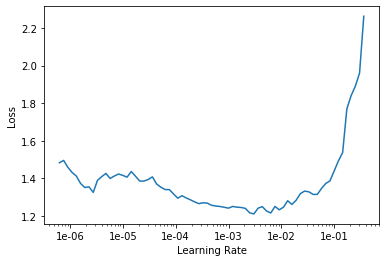

In [10]:
learn.lr_find()
learn.recorder.plot()

In [11]:
learn.fit_one_cycle(50)

epoch,train_loss,valid_loss,accuracy,time
0,0.711568,0.450788,0.784166,03:38
1,0.516395,0.459188,0.776938,03:31
2,0.435435,0.385019,0.821945,03:32
3,0.383730,0.271070,0.876150,03:32
4,0.328692,0.251878,0.884034,03:32
5,0.272799,0.233379,0.900460,03:32
6,0.254864,0.185220,0.921156,03:32
7,0.236819,0.180039,0.924442,03:32
8,0.186950,0.135691,0.949409,03:33
9,0.191196,0.144003,0.944152,03:33


In [12]:
learn.save('/home/nperez/resultadosApoptosis/stage-1-50-1erEntrenamiento')

prueba1

In [13]:
histories = []

In [ ]:
# t1 = datetime.datetime.now()
# print('Training start time = %s' %  t1)
# history = cnn_learner(data, models.resnet50, metrics=accuracy)
# history.fit_one_cycle(50)
# print('\nTraining Duration = %s' % (datetime.datetime.now()-t1))

In [14]:
histories.append(history.history)

AttributeError: 'Learner' object has no attribute 'learn'

In [ ]:
train_loss = []
val_loss = []
train_acc = []
val_acc = []
for h in histories:
    for a_loss in h['loss']:
        train_loss.append(a_loss)
    for a_loss in h['val_loss']:
        val_loss.append(a_loss)
    for a_acc in h['acc']:
        train_acc.append(a_acc)
    for a_acc in h['val_acc']:
        val_acc.append(a_acc)
epochs = range(1, len(train_loss) + 1)
plt.figure(figsize=(16, 6))
plt.subplot(121)
plt.plot(epochs, train_loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Base 8-node LSTM\nBatch Size 64\nTraining and Validation Loss')
plt.legend()
plt.subplot(122)
plt.plot(epochs, train_acc, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Base 8-node LSTM\nBatch Size 64\nTraining and Validation Accuracy')
plt.legend()
plt.show()

termina prueba1

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(1e-4,1e-3))

In [ ]:
acc_val = []
loss, acc = learn.validate()
acc_val.append(acc.numpy())

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.most_confused(min_val=2)

In [ ]:
interp.plot_confusion_matrix(figsize=(6,6), dpi=300, title = 'Confusion matrix 1h')
 
plt.tight_layout()
plt.savefig('/home/nperez/resultadosApoptosis/cMatrixTodas1H_bs8lrn1.pdf')

In [ ]:
interp.plot_confusion_matrix(figsize=(6,6), dpi=300, title = 'Confusion matrix 1h')


In [ ]:
learn.load('/home/nperez/resultadosApoptosis/stage-1-50-1erEntrenamiento');

In [15]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-5))

epoch,train_loss,valid_loss,accuracy,time
0,0.478107,0.231344,0.937911,04:45
1,0.288478,3.087402,0.919185,04:46
2,0.177920,1.108534,0.945138,04:46


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_confusion_matrix(figsize=(6,6), dpi=300, title = 'Confusion matrix 1h')

In [ ]:
interp.plot_confusion_matrix(figsize=(6,6), dpi=300, title = 'Confusion matrix 1h')
plt.tight_layout()
plt.savefig('/home/nperez/resultadosApoptosis/cMatrixTodas1H_bs16_lrSlice-3-4.pdf')

In [ ]:
print(acc_val)

In [ ]:
np.mean(acc_val)

In [ ]:
np.std(acc_val)

# Resnet 50 con default data augmentation y datos normalizados

In [ ]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), bs=bs
                                  ).normalize(imagenet_stats)

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(8)

In [ ]:
learn.save('stage-1-50')

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(1e-4,1e-3))

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.most_confused(min_val=2)

In [ ]:
interp.plot_confusion_matrix(figsize=(6,6), dpi=300, title = 'Confusion matrix 1h DA: Default, Normalized')

# Customized data augmentation

In [ ]:
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [ ]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=tfms, bs=bs
                                  ).normalize(imagenet_stats)

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(8)

In [ ]:
learn.save('stage-1-50')

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(1e-4,1e-3))

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.most_confused(min_val=2)

In [ ]:
interp.plot_confusion_matrix(figsize=(6,6), dpi=300, title = 'Confusion matrix 1h DA: Customized, Normalized')

#       data augmentation customizada y datos sin normalizar

In [ ]:
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [ ]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=tfms, bs=bs)

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(9)

In [ ]:
learn.save('stage-1-50')

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(1e-4,1e-3))

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.most_confused(min_val=2)

In [ ]:
interp.plot_confusion_matrix(figsize=(6,6), dpi=300, title = 'Confusion matrix 1h DA: ?')

# Sin data augmentation con datos normalizados

In [ ]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, bs=bs).normalize(imagenet_stats)

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(9)

In [ ]:
learn.save('stage-1-50')

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(1e-4,1e-3))

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.most_confused(min_val=2)

In [ ]:
interp.plot_confusion_matrix(figsize=(6,6), dpi=300, title = 'Confusion matrix normalized')

In [ ]:
interp.plot_confusion_matrix(figsize=(6,6), dpi=300, title = 'Confusion matrix 1h')
#sns.set(font_scale=3.0) 
plt.tight_layout()
#plt.savefig('/home/nperez/resultadosApoptosis/cMatrixTodas1H_bs16.pdf')

# Cross-validation

In [ ]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, bs=bs)

In [ ]:
df = data.to_df()
df.head()

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [ ]:
acc_val = []
torch.cuda.device_count()
for train_index, val_index in skf.split(df.index, df['y']):
    data_fold = (ImageList.from_df(df, path_img).split_by_idxs(train_index, val_index)
                .label_from_df().databunch(num_workers=0))
    learn = cnn_learner(data_fold, models.resnet50, metrics=error_rate)
    learn.fit_one_cycle(8)
    loss, acc = learn.validate()
    acc_val.append(acc.numpy())

In [ ]:
np.mean(acc_val)

In [ ]:
np.std(acc_val)